<a href="https://colab.research.google.com/github/dan-shapovalov/GenAI/blob/main/HW3/HW3_EC_Chatbot_Long_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chat Interface with Long-Term Memroy**

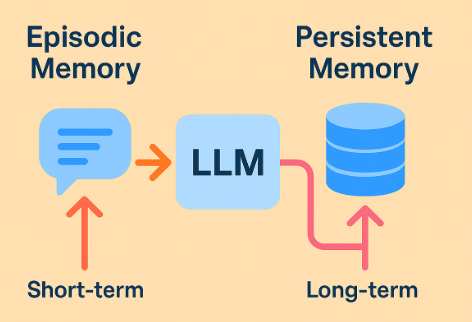

In [ ]:
# Install the needed libraries
!pip install -qU langchain-google-genai

# The SQL memory features
!pip install -U langchain-community

# **Transition from Short-Term to Long-Term Memory**

* In the short-term memory notebook, if we stopped the program and restarted it, the **chat_history** list would be empty and the AI would forget everything.

* Using **SQLChatMessageHistory** ensures the conversation survives even if we turn off the computer.

* **connection_string="sqlite:///joke_factory.db**
   * This tells the program to create a **SQLite Database** file on the computer named **joke_factory.db**
   
   * Before, memory was stored in a **Python list (temporary)**
   
   * But now, memory is stored in a **database file (permanent)**

* **session_id**
   * This is like a label on a folder.
   * If we set the ID to **science_comedian_v1**, the database saves all messages under that **folder**

---
* The best part of using **SQLChatMessageHistory** is that we no longer need to manually manage the list.

  * When we add a message, it is instantly written to the .db file.

  * When we start the program, it automatically reads the old messages from the .db file into the AI's context.

  ---
* **About SQLite**
   * Unlike MySQL, SQLite doesn't have a separate server process.
   
   * There is no **installing** a database service.
   
   * It is a library that is built-in to Python.
   
   * When we specify a filename such as **joke_factory.db**, the database engine simply starts running inside yotheur code

   * The entire database—including all tables, indexes, and the chat history—is stored in one single cross-platform file.

   * In production environments, LLMs use MySQL for **Long-Term Memory** primarily to handle scale and structured data.

   * If we want to build a **Gym Bot**  used by 5,000 people, we can't have 5,000 different .db files floating around. MySQL allows us to store every user's chat history in one massive table, using a user_id column to keep them separate.


  ---


In [ ]:
import os
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage
from langchain_community.chat_message_histories import SQLChatMessageHistory

# Setup
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(
    model="gemini-3-flash-preview",
    temperature=0.1
)

# The Chat Loop
while True:
  # The following section can be outside of the loop, if the user
  # wants to have long conversations with either Science or American History bots.
  # For the purpose of this exercise, I kept it inside the while loop because we
  # have only one message to the bots at a time, automatically exiting the corresponding sessions id.
  #---------------------------------------------------------
  # 1. THE MENU
  print("--- CHATBOT MENU ---")
  print("1. Science Facts")
  print("2. American History")
  choice = input("Select a topic to load: ")

  # 2. DYNAMIC SESSION MAPPING
  topic_map = {"1": "science_session", "2": "history_session"}
  current_session = topic_map.get(choice, "general_session")

  # 3. INITIALIZE HISTORY
  # The bot will ONLY see messages associated with this specific ID

  history = SQLChatMessageHistory(
    session_id=current_session,
    connection_string="sqlite:///chat_history.db"
  )
  #---------------------------------------------------------
  user_input = input("You: ")

  if user_input.lower() in ["exit", "quit", "bye"]:
      print("Goodbye!")
      break

  # Add user's message to the SQLite database
  history.add_user_message(user_input)

  # Get the AI response
  # We pass the ENTIRE history from the database to Gemini
  response = llm.invoke(history.messages)
  ai_text = response.content[0]['text']

  print(f"{current_session}: {ai_text}")

  # Save the AI's response to the SQLite database
  history.add_ai_message(ai_text)

# **Google Drive Persistence**

* By default, Colab files are deleted when you close the tab.

* To make this memory truly permanent by surviving even Colab timeouts, **mount** your Google Drive and **change the connection string**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change connection string to save inside your Drive
chat_history = SQLChatMessageHistory(
    session_id=session_id,
    connection_string="sqlite:////content/drive/MyDrive/joke_factory.db"
)

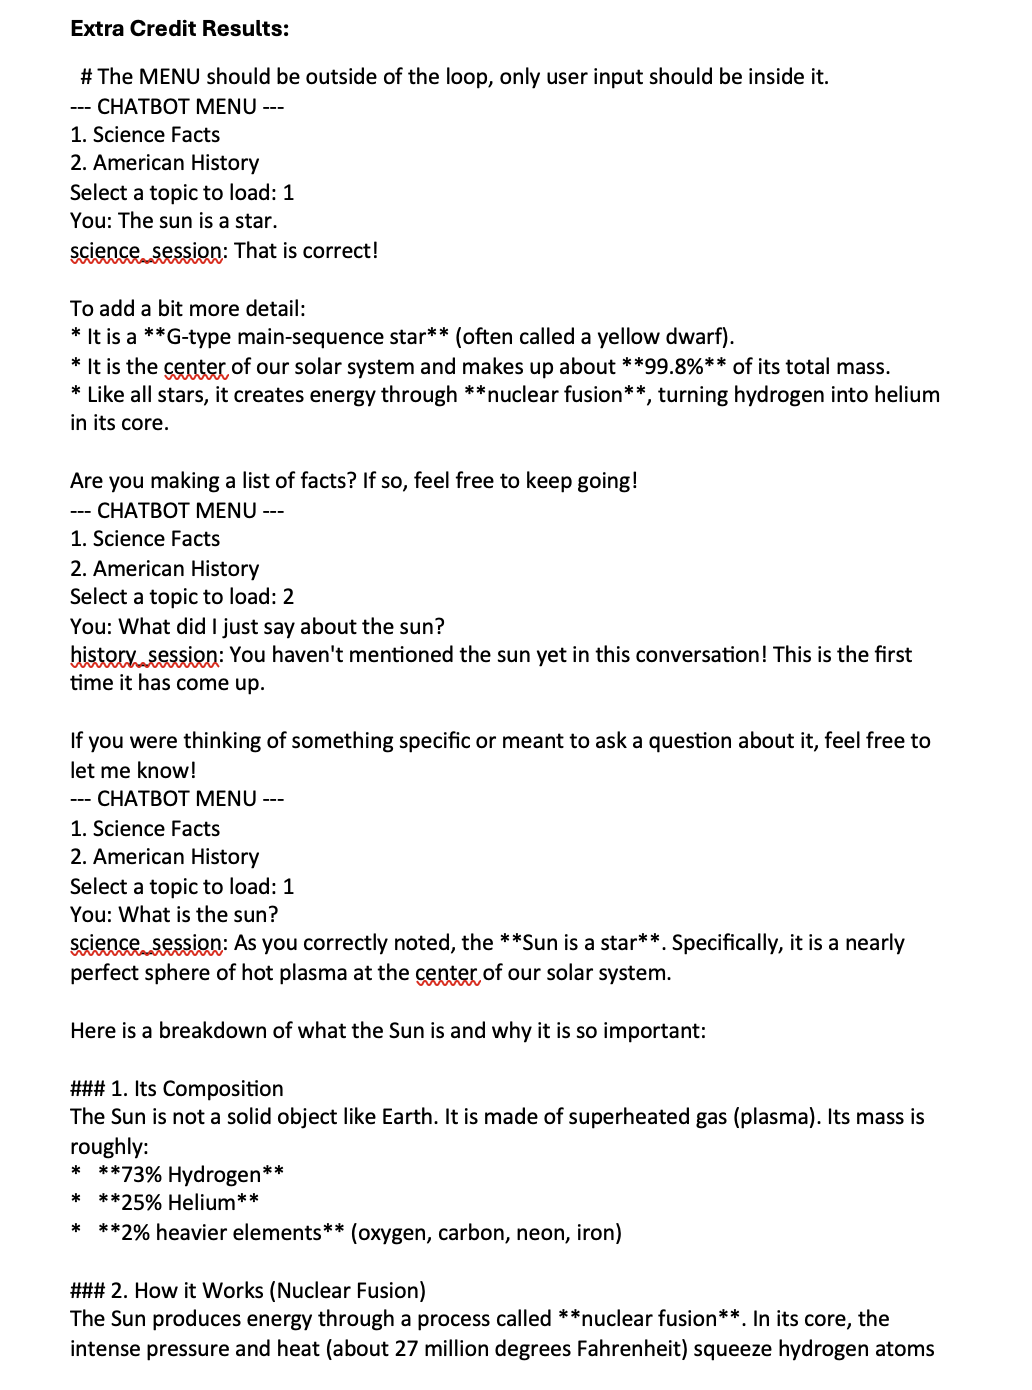

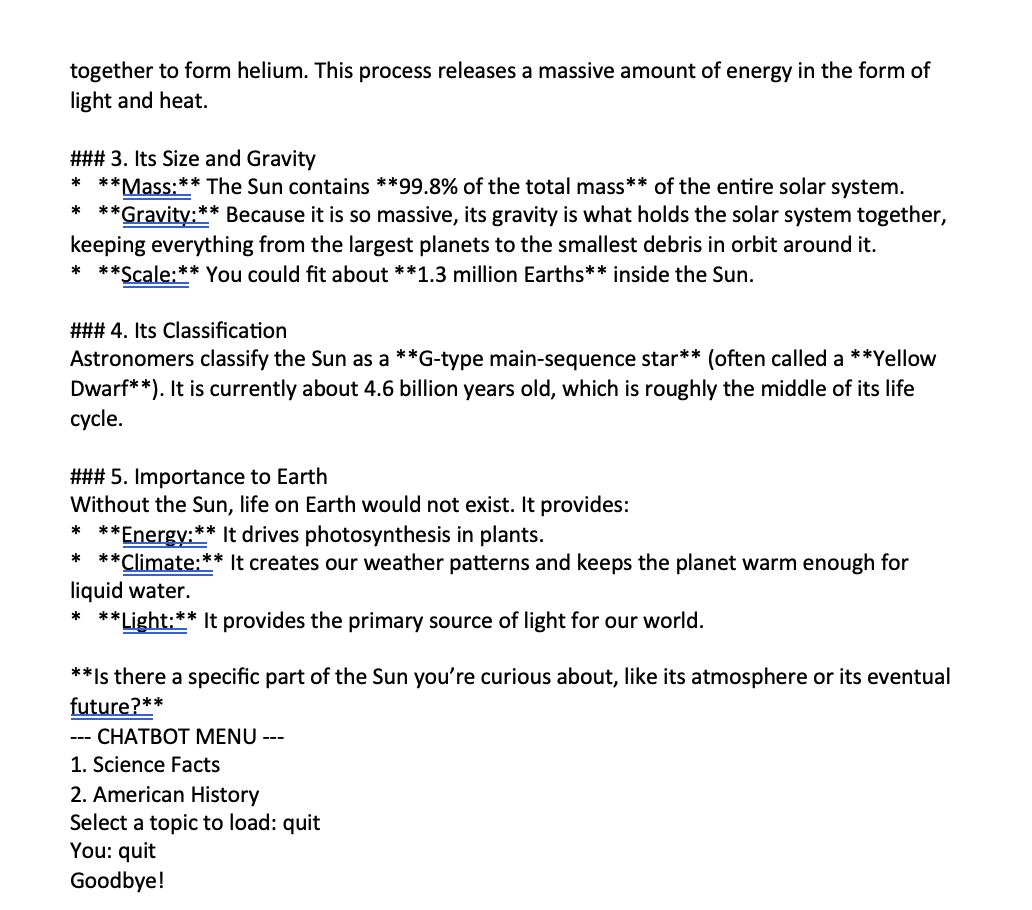

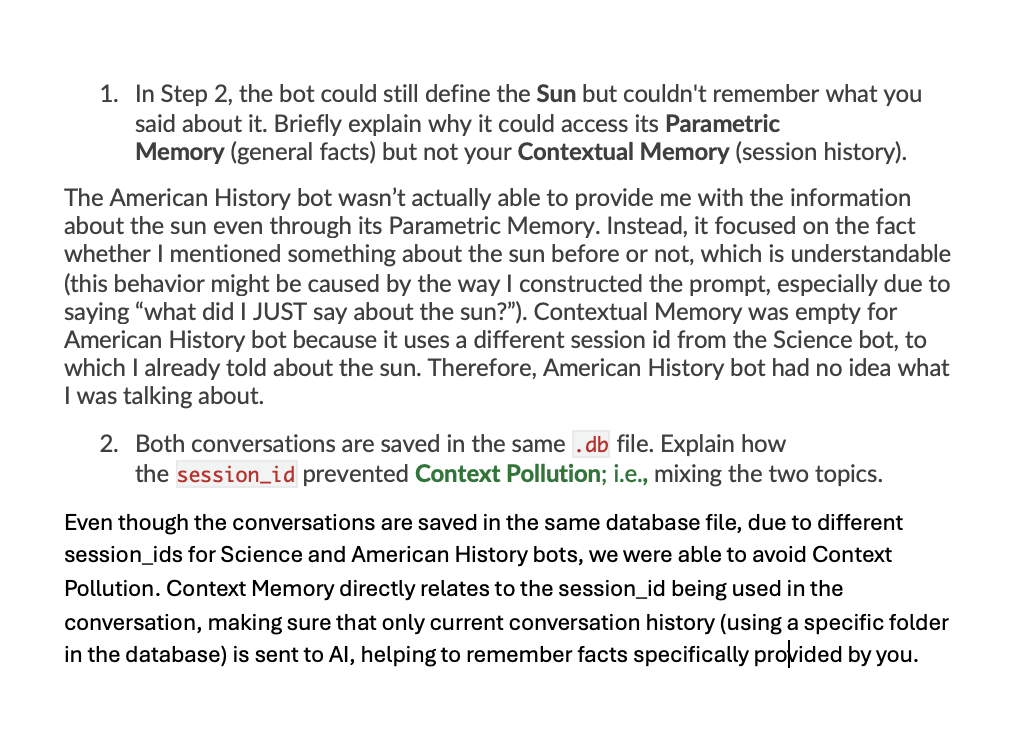